In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle

In [5]:
records = []
for depth in range(1, 13):
    print depth
    path = 'models/MLP%s-10-DReLU-activation' % ('-1024' * depth)
    records.append(pickle.load(open(path, 'rb')))

1
2
3
4
5
6
7
8
9
10
11
12


1
2
3
4
5
6
7
8
9
10
11
12


IndexError: list index out of range

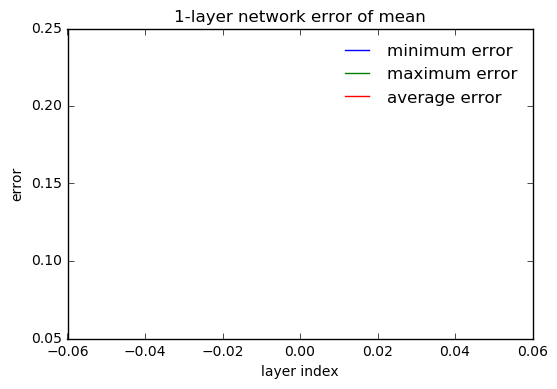

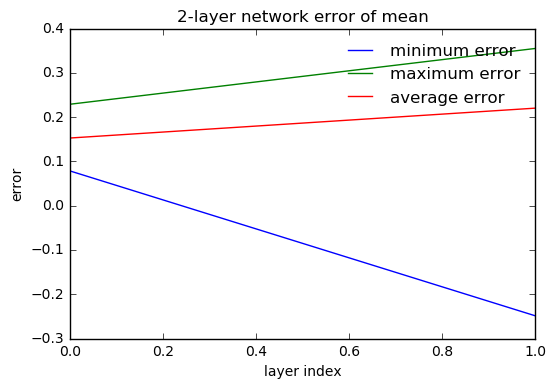

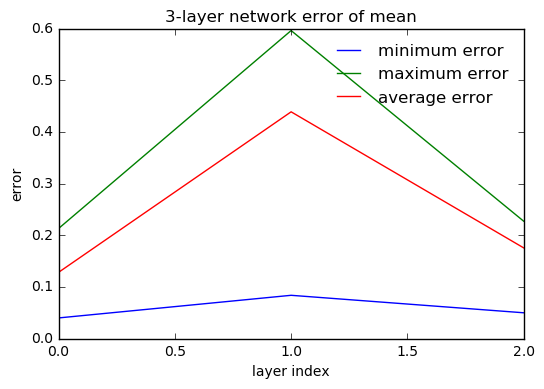

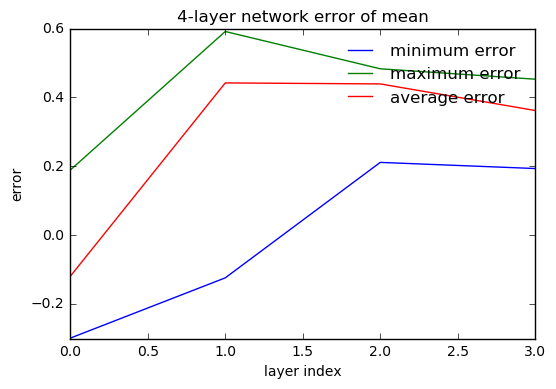

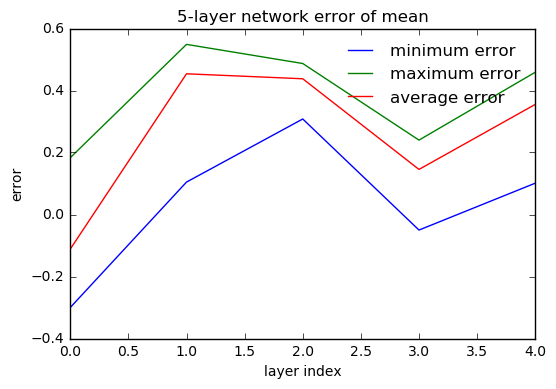

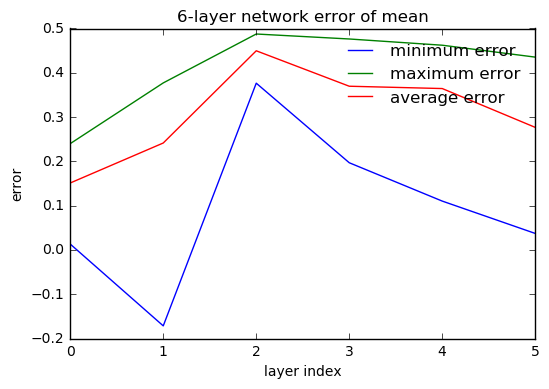

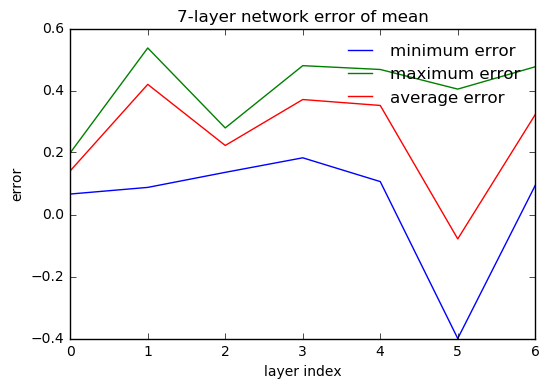

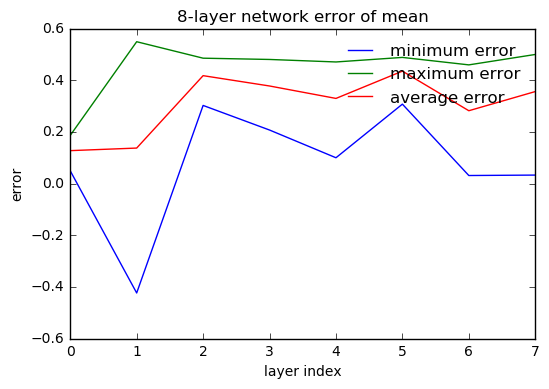

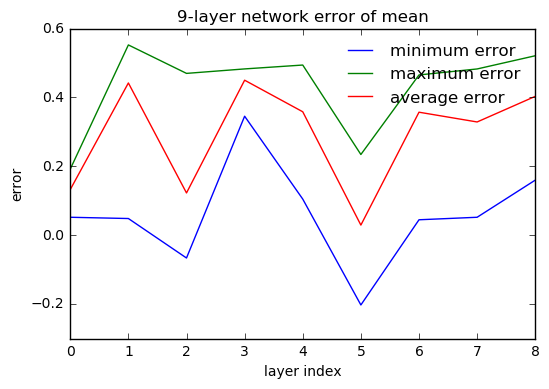

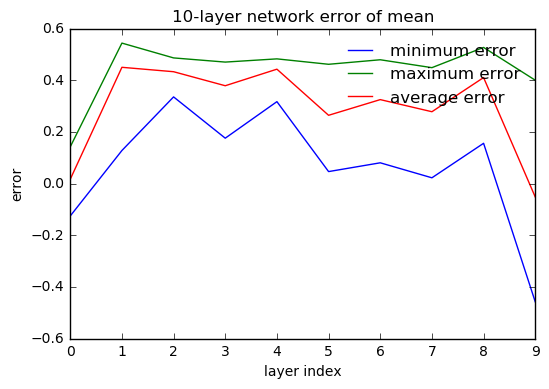

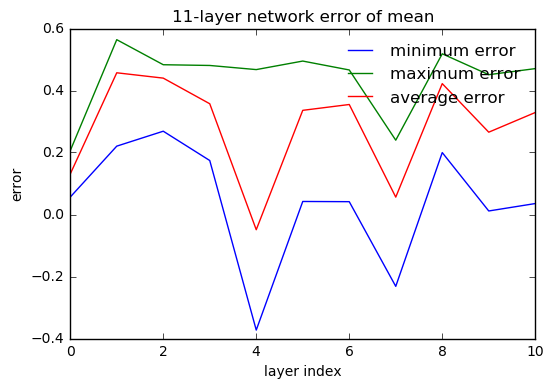

In [11]:
for depth in range(1, 13):
    print depth
    minimum = []
    maximum = []
    average = []
    for layer in range(depth):
        activation = records[depth]['training'][layer].asnumpy()
        lower = activation.min(axis=0)
        upper = activation.max(axis=0)
        inferred_mean = (lower + upper) / 2
        mean = activation.mean(axis=0)
        error = inferred_mean - mean
        minimum.append(error.min())
        maximum.append(error.max())
        average.append(error.mean())
    pl.figure()
    pl.title('%d-layer network error of mean' % depth)
    pl.xlabel('layer index')
    pl.ylabel('error')
    pl.plot(range(depth), minimum, label='minimum error')
    pl.plot(range(depth), maximum, label='maximum error')
    pl.plot(range(depth), average, label='average error')
    pl.legend(framealpha=0)